# Breast Cancer Coimbra

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

Model en_core_web_md is not installed. Refer to the ehrapy installation instructions if 
required.

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv -O breast_cancer_coimbra.csv

File ‘breast_cancer_coimbra.csv’ already there; not retrieving.


# Data Wrangling

In [4]:
data = pd.read_csv("breast_cancer_coimbra.csv",
                   sep=",")

Change attribute name of "Classification" to "Class"

In [5]:
data = data.rename(columns={"Classification": "Class"})

Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

In [7]:
data.set_index("patient_id", inplace=True)

In [8]:
data.to_csv("breast_cancer_coimbra_prepared.csv")

## ehrapy sanity check

In [9]:
adata = ep.io.read("breast_cancer_coimbra_prepared.csv",
                   extension="csv",
                   index_column="patient_id")

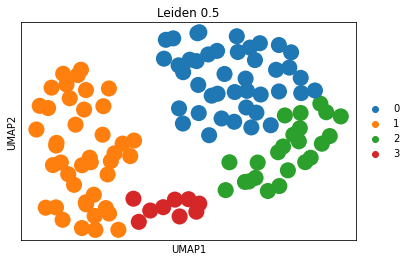

In [10]:
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

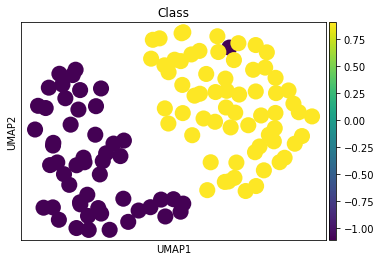

In [11]:
ep.pl.umap(adata, color=["Class"], ncols=1, wspace=0.75)